In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pylab import rcParams
from sklearn import preprocessing

import scipy
from scipy.stats.stats import pearsonr

In [3]:
%matplotlib inline
pylab.rcParams[ 'figure.figsize' ] = 5 , 4
sns.set_style('whitegrid')

In [4]:
Transit_Reviews=pd.read_csv("landmarks_count.csv", usecols=['Hotel_Name','landmark_count','Review_Count'])
Transit_Reviews = Transit_Reviews.drop_duplicates()
Transit_Reviews.index = pd.RangeIndex(start=0, stop=len(Transit_Reviews), step=1)
Transit_Reviews.to_csv('landmarks_count.csv')
Transit=pd.read_csv("landmarks_count.csv", usecols=['Hotel_Name','landmark_count','Review_Count'])



In [5]:
Hotel_Reviews=pd.read_csv("Hotel_Reviews.csv",usecols=['Hotel_Name','Reviewer_Score'])
Hotel_Reviews.head()

,Hotel_Name,Reviewer_Score
0,Hotel Arena,2.9
1,Hotel Arena,7.5
2,Hotel Arena,7.1
3,Hotel Arena,3.8
4,Hotel Arena,6.7


In [6]:
Hotel_name=np.array([])
mean_reviewer_score=np.array([])

In [7]:
Hotels=Hotel_Reviews.Hotel_Name.unique()

In [8]:
for Hotel in Hotels:
    TEMP=Hotel_Reviews.loc[Hotel_Reviews['Hotel_Name']==Hotel]
    TEMP=TEMP.reset_index()
    Hotel_name=np.append(Hotel_name,Hotel)
    
    mean_reviewer_score=np.append(mean_reviewer_score, TEMP['Reviewer_Score'].mean())

In [9]:
column1=['Hotel_name','mean_reviewer_score']

In [10]:
data1=np.column_stack((Hotel_name, mean_reviewer_score))

In [11]:
HotelReviews=pd.DataFrame(data1, columns=column1)
HotelReviews['mean_reviewer_score']=pd.to_numeric(HotelReviews['mean_reviewer_score'])
HotelReviews=HotelReviews[['mean_reviewer_score']]
HotelReviews.head()

,mean_reviewer_score
0,7.836296
1,8.602827
2,9.298843
3,7.711469
4,8.848571


In [12]:
Connections=pd.concat([Transit_Reviews, HotelReviews], ignore_index=False, axis=1)
Connect = Connections[Connections.landmark_count!='-']

Connect['landmark_count']=Connect['landmark_count'].astype(str).astype(int)
Connect

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Hotel_Name,landmark_count,Review_Count,mean_reviewer_score
0,Hotel Arena,6,405.0,7.836296
1,K K Hotel George,2,566.0,8.602827
2,Apex Temple Court Hotel,4,1037.0,9.298843
3,The Park Grand London Paddington,3,1770.0,7.711469
4,Monhotel Lounge SPA,1,35.0,8.848571
5,Kube Hotel Ice Bar,6,19.0,5.852632
6,The Principal London,8,1425.0,8.029333
7,Park Plaza County Hall London,6,2223.0,8.369546
8,One Aldwych,6,136.0,9.144853
9,Splendid Etoile,1,127.0,9.142520


In [13]:
TransitGroups=Connect.landmark_count.unique()

In [14]:
TransitGroups.size

11

In [15]:
Connect['landmark_count'].value_counts().sort_values(ascending=False)

2     236
3     187
4     179
1     168
5     157
10    143
6     136
7      94
8      69
0      58
9      50
Name: landmark_count, dtype: int64

In [29]:
bins = [-1, 2, 4, 6, 8,  20]
groups=Connect.groupby(['landmark_count',pd.cut(Connect.landmark_count, bins)])
Transits = groups.size().unstack().sum()
Transits

landmark_count
(-1, 2]    462.0
(2, 4]     366.0
(4, 6]     293.0
(6, 8]     163.0
(8, 20]    193.0
dtype: float64

In [30]:
Con1 = Connect[Connect.landmark_count<3].mean_reviewer_score.mean()
Con1

8.365479676786508

In [31]:
Con2 = Connect[(Connect['landmark_count']>2) & (Connect['landmark_count']<5)].mean_reviewer_score.mean()
Con2

8.519857792217033

In [32]:
Con3 = Connect[(Connect['landmark_count']>4) & (Connect['landmark_count']<7)].mean_reviewer_score.mean()
Con3

8.491537231052016

In [33]:
Con4 = Connect[(Connect['landmark_count']>6) & (Connect['landmark_count']<9)].mean_reviewer_score.mean()
Con4

8.535132523955864

In [34]:
Con5 = Connect[(Connect['landmark_count']>8) & (Connect['landmark_count']<11)].mean_reviewer_score.mean()
Con5

8.52433227973343

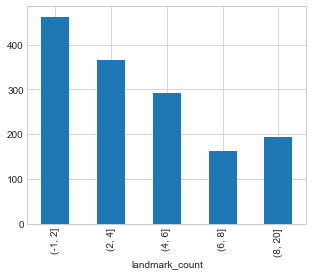

In [35]:
Transits.plot('bar')
plt.show()

Text(0,0.5,'Number of Hotels')

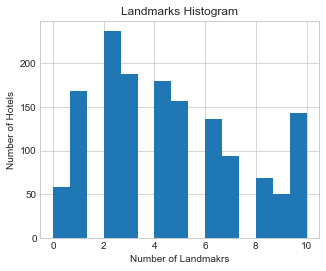

In [37]:
hist_plot = Connect['landmark_count'].hist(bins=15)
hist_plot.set_title('Landmarks Histogram')
hist_plot.set_xlabel('Number of Landmakrs')
hist_plot.set_ylabel('Number of Hotels')